<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSFUN/SVM_CHURN_TC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**DATOS**

In [ ]:
!pip install pyreadstat
import pyreadstat
Data = pd.read_spss("BASE CHURN TC.sav")

In [ ]:
Data.isnull().sum()

CodCli                    0
Edad                      0
Gener                     0
EstCiv                    0
Sexo                      0
Ingreso                   0
TipSuel                   0
NZona                     0
FechIni                   0
FechCor                   0
AntiAño                   0
AntiMes                   0
Ahorro                 8478
Plazo                  9828
Cts                    9869
Chip                   9958
Vehicular              9998
Pld                    9934
LineaTC                   0
SaldoTC                   0
CredTienda             9914
Convenios              9964
CantProd                  0
LinTC_RCC_BCP          7271
LinTC_RCC_IBK          6319
LinTC_RCC_Scotia       9174
LinTC_RCC_Conti        8623
LinTC_RCC_Comercio    10000
LinTC_RCC_BIF          9870
LinTC_RCC_Credi        7470
LinTC_RCC_Ripley       7092
LinTC_RCC_Finan        1083
LinTC_RCC_GNB          9929
LinTC_RCC_Cenco        8459
LinTC_RCC_Azt          9832
LinTC_RCC_Fala      

In [ ]:
Data["D_LinTC_RCC_BCP"] = np.where(Data["LinTC_RCC_BCP"].isnull() == True,0,1)
Data["D_LinTC_RCC_IBK"] = np.where(Data["LinTC_RCC_IBK"].isnull() == True,0,1)
Data["D_LinTC_RCC_Conti"] = np.where(Data["LinTC_RCC_Conti"].isnull() == True,0,1)
Data["D_LinTC_RCC_Credi"] = np.where(Data["LinTC_RCC_Credi"].isnull() == True,0,1)
Data["D_LinTC_RCC_Ripley"] = np.where(Data["LinTC_RCC_Ripley"].isnull() == True,0,1)
Data["D_LinTC_RCC_Finan"] = np.where(Data["LinTC_RCC_Finan"].isnull() == True,0,1)
Data["D_LinTC_RCC_Cenco"] = np.where(Data["LinTC_RCC_Cenco"].isnull() == True,0,1)
Data["D_LinTC_RCC_Fala"] = np.where(Data["LinTC_RCC_Fala"].isnull() == True,0,1)
Data["D_LinTC_RCC_Uno"] = np.where(Data["LinTC_RCC_Uno"].isnull() == True,0,1)
Data["D_SalTC_RCC_BCP"] = np.where(Data["SalTC_RCC_BCP"].isnull() == True,0,1)
Data["D_SalTC_RCC_IBK"] = np.where(Data["SalTC_RCC_IBK"].isnull() == True,0,1)
Data["D_SalTC_RCC_Credi"] = np.where(Data["SalTC_RCC_Credi"].isnull() == True,0,1)
Data["D_SalTC_RCC_Ripley"] = np.where(Data["SalTC_RCC_Ripley"].isnull() == True,0,1)
Data["D_SalTC_RCC_Finan"] = np.where(Data["SalTC_RCC_Finan"].isnull() == True,0,1)
Data["D_SalTC_RCC_Cenco"] = np.where(Data["SalTC_RCC_Cenco"].isnull() == True,0,1)
Data["D_SalTC_RCC_Fala"] = np.where(Data["SalTC_RCC_Fala"].isnull() == True,0,1)
Data["D_SalTC_RCC_Uno"] = np.where(Data["SalTC_RCC_Uno"].isnull() == True,0,1)
Data["D_TotSal_RCC_TC"] = np.where(Data["TotSal_RCC_TC"].isnull() == True,0,1)
Data["D_MaxSal_RCC_TC"] = np.where(Data["MaxSal_RCC_TC"].isnull() == True,0,1)

In [ ]:
Data["T_MaxLinTC_RCC"] = np.log(Data["MaxLinTC_RCC"])
Data["T_LineaTC"] = np.log(Data["LineaTC"])
Data["T_Ingreso"] = np.log(Data["Ingreso"])
Data["D_SaldoTC"] = np.where(Data["SaldoTC"] == 0,0,1)

In [ ]:
Data["D_Gener_BB"] = np.where(Data["Gener"] == "BABY BOOMERS : [50 - 68]",1,0)
Data["D_Gener_X"] = np.where(Data["Gener"] == "X : [36 - 49]",1,0)
Data["D_Gener_Y"] = np.where(Data["Gener"] == "Y : [20 - 35]",1,0)
Data["D_EstCiv_Cas"] = np.where(Data["EstCiv"] == "Casado",1,0)
Data["D_EstCiv_Sol"] = np.where(Data["EstCiv"] == "Soltero",1,0)
Data["D_EstCiv_Conv"] = np.where(Data["EstCiv"] == "Conviviente",1,0)
Data["D_Sexo_H"] = np.where(Data["Sexo"] == "Masculino",1,0)
Data["D_NZONA_ZC"] = np.where(Data["NZona"] == "ZONA CENTRO",1,0)
Data["D_NZONA_ZN"] = np.where(Data["NZona"] == "ZONA NORTE",1,0)
Data["D_NZONA_ZS"] = np.where(Data["NZona"] == "ZONA SUR",1,0)
Data["D_Depen"] = np.where(Data["TipSuel"] == "DEPENDIENTE",1,0)
Data["D_Informal"] = np.where(Data["TipSuel"] == "INFORMAL",1,0)
Data["D_SalTC_Fin"] = np.where(Data["Entidad_RCC_TC"] == "B.Financiero",1,0)
Data["D_SalTC_CrediScotia"] = np.where(Data["Entidad_RCC_TC"] == "F.Crediscotia",1,0)
Data["Fuga"] = np.where(Data["ChurnTC"] == "SI",1,0)

**Master Table**

In [ ]:
DataModelo = pd.DataFrame(Data, columns=["Edad","D_EstCiv_Cas","D_EstCiv_Sol","D_EstCiv_Conv","D_Sexo_H",
                                         "D_NZONA_ZC","D_NZONA_ZN","D_NZONA_ZS","T_Ingreso",
                                         "T_MaxLinTC_RCC","CantProd",
                                         "D_LinTC_RCC_BCP","D_LinTC_RCC_IBK","D_LinTC_RCC_Conti",
                                         "D_LinTC_RCC_Ripley","D_LinTC_RCC_Cenco","D_LinTC_RCC_Fala","D_LinTC_RCC_Uno",
                                         "D_SalTC_RCC_BCP","D_SalTC_RCC_IBK","D_SalTC_RCC_Credi","D_SalTC_RCC_Ripley",
                                         "D_SalTC_RCC_Finan","D_SalTC_RCC_Cenco","Fuga"])

In [ ]:
DataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                10000 non-null  float64
 1   D_EstCiv_Cas        10000 non-null  int64  
 2   D_EstCiv_Sol        10000 non-null  int64  
 3   D_EstCiv_Conv       10000 non-null  int64  
 4   D_Sexo_H            10000 non-null  int64  
 5   D_NZONA_ZC          10000 non-null  int64  
 6   D_NZONA_ZN          10000 non-null  int64  
 7   D_NZONA_ZS          10000 non-null  int64  
 8   T_Ingreso           10000 non-null  float64
 9   T_MaxLinTC_RCC      10000 non-null  float64
 10  CantProd            10000 non-null  float64
 11  D_LinTC_RCC_BCP     10000 non-null  int64  
 12  D_LinTC_RCC_IBK     10000 non-null  int64  
 13  D_LinTC_RCC_Conti   10000 non-null  int64  
 14  D_LinTC_RCC_Ripley  10000 non-null  int64  
 15  D_LinTC_RCC_Cenco   10000 non-null  int64  
 16  D_Lin

In [ ]:
DataModelo.head()

,Edad,D_EstCiv_Cas,D_EstCiv_Sol,D_EstCiv_Conv,D_Sexo_H,D_NZONA_ZC,D_NZONA_ZN,D_NZONA_ZS,T_Ingreso,T_MaxLinTC_RCC,...,D_LinTC_RCC_Cenco,D_LinTC_RCC_Fala,D_LinTC_RCC_Uno,D_SalTC_RCC_BCP,D_SalTC_RCC_IBK,D_SalTC_RCC_Credi,D_SalTC_RCC_Ripley,D_SalTC_RCC_Finan,D_SalTC_RCC_Cenco,Fuga
0,57.0,1,0,0,1,0,0,0,8.442745,11.344507,...,0,0,0,1,0,0,0,0,0,0
1,49.0,0,1,0,1,0,1,0,7.560080,9.852194,...,0,0,0,0,0,0,1,0,0,0
2,75.0,0,0,0,0,0,1,0,7.077000,9.276240,...,1,1,1,0,0,0,0,0,0,0
3,61.0,0,1,0,1,0,0,0,7.135520,8.788746,...,0,0,0,0,0,0,0,0,0,0
4,65.0,1,0,0,1,0,1,0,6.807603,7.344719,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
DataModelo.isnull().sum()

Edad                  0
D_EstCiv_Cas          0
D_EstCiv_Sol          0
D_EstCiv_Conv         0
D_Sexo_H              0
D_NZONA_ZC            0
D_NZONA_ZN            0
D_NZONA_ZS            0
T_Ingreso             0
T_MaxLinTC_RCC        0
CantProd              0
D_LinTC_RCC_BCP       0
D_LinTC_RCC_IBK       0
D_LinTC_RCC_Conti     0
D_LinTC_RCC_Ripley    0
D_LinTC_RCC_Cenco     0
D_LinTC_RCC_Fala      0
D_LinTC_RCC_Uno       0
D_SalTC_RCC_BCP       0
D_SalTC_RCC_IBK       0
D_SalTC_RCC_Credi     0
D_SalTC_RCC_Ripley    0
D_SalTC_RCC_Finan     0
D_SalTC_RCC_Cenco     0
Fuga                  0
dtype: int64

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = DataModelo.drop(columns = 'Fuga')
y = DataModelo['Fuga']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

**Balaceo de la data**

In [ ]:
import collections
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y2_train = pd.DataFrame(y_train)
y2_train_smote = pd.DataFrame(y_train_smote)
Tabla_conteo_smote = pd.DataFrame({"FREC_ORI":y2_train.value_counts(),
                                "FREC_SMOTE":y2_train_smote.value_counts()})
Tabla_conteo_smote

,FREC_ORI,FREC_SMOTE
0,,
0,6441,6441
1,1559,6441


**SVM Lineal**

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train_smote, y_train_smote)

SVC(C=100, kernel='linear', random_state=123)

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 61.25000000000001%


In [ ]:
probs_test = modelo.predict(X_test)
probs_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
probs_test = modelo.predict(X_test)
y_pred_test = np.where(probs_test<=0.5, 0, 1)
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred_test,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1100,533
1,242,125


**SVM Radial**

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.128838,0.762520,0.023223,0.790778,0.035372
12,379.269019,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.586679,0.738062,0.064044,0.859431,0.019840


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1288378916846884} : 0.7625203820172374 accuracy


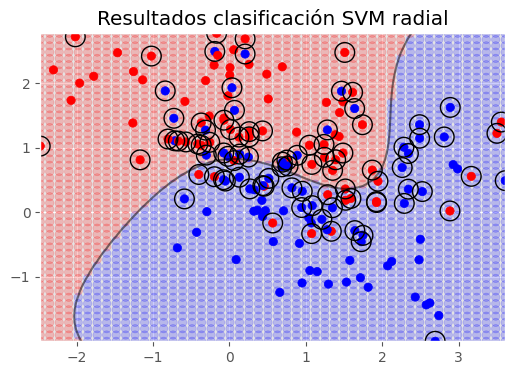

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

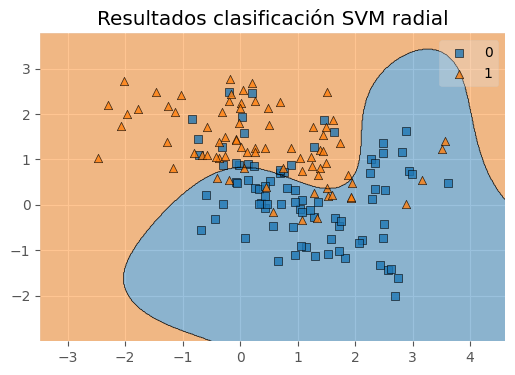

In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.0%


In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,14,3
1,5,18
